In [3]:
import pandas as pd

Importo dei csv test e train in un unico dataframe 

In [4]:
df_test = pd.read_csv('data/test.csv')

df_train = pd.read_csv('data/train.csv')

df = pd.concat([df_test, df_train])

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


Importo del dizionario del dataset

In [5]:
df_dict = pd.read_csv('data/dictionary.csv')

display(df_dict)

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


#### Analizziamo le tipologie di variabili che abbiamo a disposizione.

Variabili **categoriche**:
 - Sex (male/female);
 - Pclass (3rd/2nd/1st);
 - Embarked (port);
 - Survived (true/false).

Variabili **ordinali**:
 - Pclass (3rd/2nd/1st);
 - Sibsp (siblings+spouse);
 - Parch (parents+children).

Variabili **continue**:
 - Age;
 - Fare (price of ticket).

Non considerate:
 - PasssengerId;
 - Name;
 - Cabin.

In [15]:
df_survived = df['Survived'].value_counts(dropna=False)

In [9]:
import matplotlib as plt

In [12]:
import matplotlib.pyplot as plt

<Axes: xlabel='Survived'>

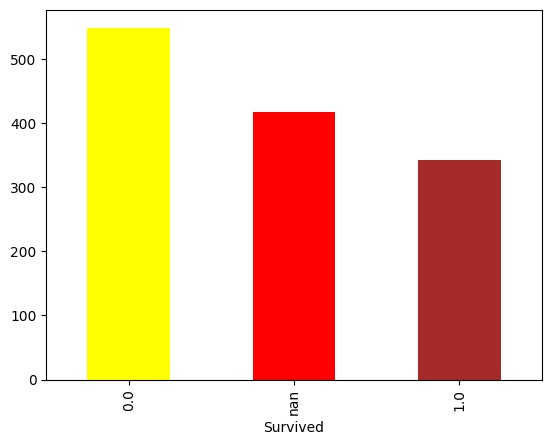

In [18]:
plt.figure()
df_survived.plot(kind='bar', color=['yellow', 'red', 'brown'])